In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def Euler(a, b, y0, f, N, verbose=True):
    """
    Implementación método de Euler
    Entradas:
    a -- inicio intervalo
    b -- fin intervalo
    y0 -- aproximación inicial
    f -- función
    N -- pasos

    Salida:
    w -- aproximación final
    """
    h = (b - a)/N
    t = a
    w = y0
    temp1 = [t]
    temp2 = [w]
    if verbose: print("t0  = {0:.2f}, w0  = {1:.12f}".format(t, w))
    for i in range(1, N+1):
        w = w + h*f(t, w)
        t = a + i*h
        if verbose: print("t{0:<2} = {1:.2f}, w{0:<2} = {2:.12f}".format(i, t, w))
        temp1.append(t)
        temp2.append(w)
        list_sol= [temp1, temp2]
    return list_sol, w

In [72]:
print("Método de Euler:")
def test2(t, y):
    """Función de prueba"""
    return 2 - np.exp(-4*t) - 2*y  # $y'=2-e^{-4t}-2y$

def sol_ecu_dif(t):
    return np.exp(-4*t)*(0.5-np.exp(2*t)+np.exp(4*t))

list_sol, sol = Euler(0, 1, 0.5, test2, 5)
sol

Método de Euler:
t0  = 0.00, w0  = 0.500000000000
t1  = 0.20, w1  = 0.500000000000
t2  = 0.40, w2  = 0.610134207177
t3  = 0.60, w3  = 0.725701220707
t4  = 0.80, w4  = 0.817277141766
t5  = 1.00, w5  = 0.882213844264


0.8822138442641181

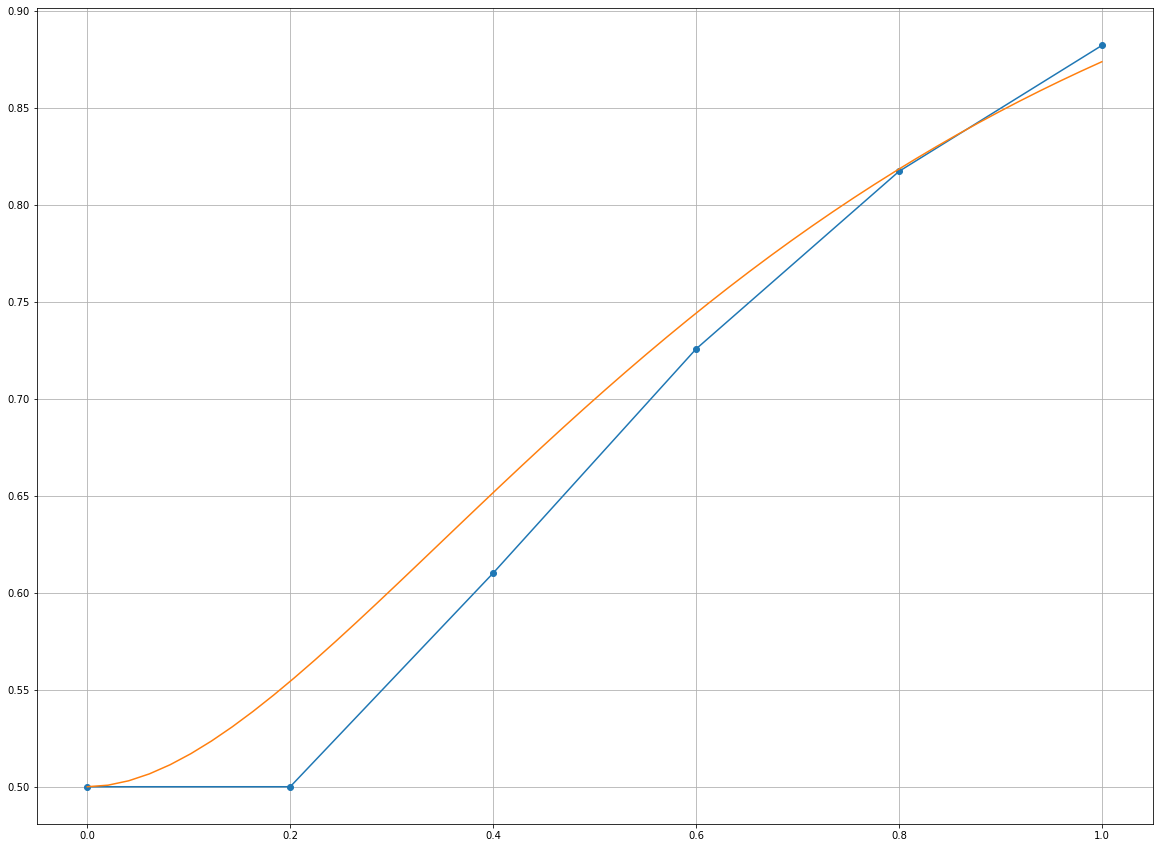

In [67]:
x = np.linspace(0, 1)
plt.figure(figsize=[20,15])
plt.plot(list_sol[0], list_sol[1], '-o')
plt.plot(x, sol_ecu_dif(x), '-')
plt.grid()

In [75]:
def Rugen_kutta_2(a, b, y0, f, N, a_2=0.5, verbose=True):
    """
    Implementación método de Euler
    Entradas:
    a -- inicio intervalo
    b -- fin intervalo
    y0 -- aproximación inicial
    f -- función
    N -- pasos

    Salida:
    w -- aproximación final
    """
    h = (b - a)/N
    t = a
    w = y0
    a_1 = 1 - a_2
    p_1 = 0.5 / a_2
    q_11 = 0.5 / a_2
    temp1 = [t]
    temp2 = [w]

    if verbose: print("t0  = {0:.2f}, w0  = {1:.12f}".format(t, w))

    def phi(t, w, h):
        k1 = f(t,w)
        k2 = f(t + p_1*h, w + q_11*k1*h)
        return a_1*k1 + a_2*k2

    for i in range(1, N+1):
        w = w + h* phi(t, w, h)
        t = a + i*h
        if verbose: print("t{0:<2} = {1:.2f}, w{0:<2} = {2:.12f}".format(i, t, w))
        temp1.append(t)
        temp2.append(w)
        list_sol= [temp1, temp2]
    return list_sol, w

In [83]:
print("Método de Rugen-Kutta orden 2 (a_2 = 1):")
def test2(t, y):
    """Función de prueba"""
    return 2 - np.exp(-4*t) - 2*y  # $y'=2-e^{-4t}-2y$

def sol_ecu_dif(t):
    return np.exp(-4*t)*(0.5-np.exp(2*t)+np.exp(4*t))

list_sol_1, sol_1 = Rugen_kutta_2(0, 1, 0.5, test2, 5, a_2=1)
sol_1

Método de Rugen-Kutta orden 2 (a_2 = 1):
t0  = 0.00, w0  = 0.500000000000
t1  = 0.20, w1  = 0.565935990793
t2  = 0.40, w2  = 0.662570789921
t3  = 0.60, w3  = 0.751556941219
t4  = 0.80, w4  = 0.822525425635
t5  = 1.00, w5  = 0.875483033102


0.8754830331017918

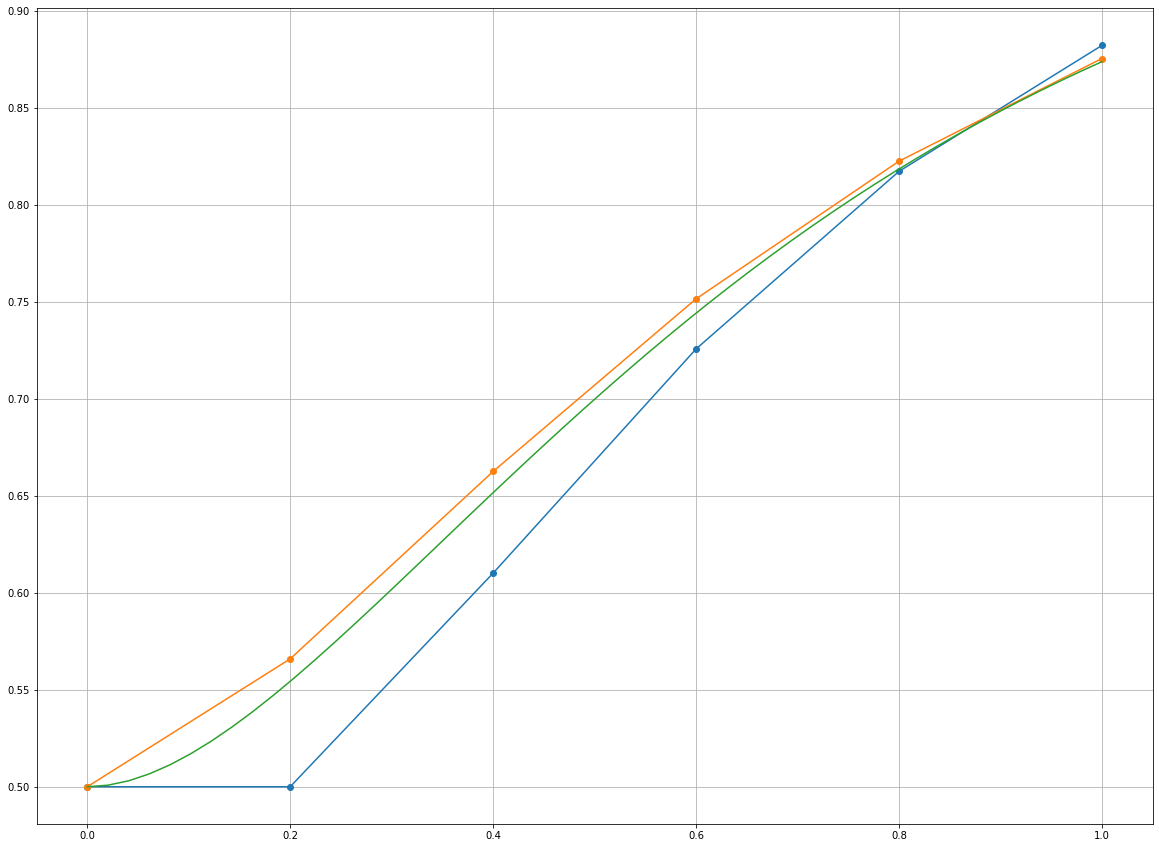

In [84]:
x = np.linspace(0, 1)
plt.figure(figsize=[20,15])
plt.plot(list_sol[0], list_sol[1], '-o')
plt.plot(list_sol_1[0], list_sol_1[1], '-o')
plt.plot(x, sol_ecu_dif(x), '-')
plt.grid()

In [85]:
def Rugen_kutta_3(a, b, y0, f, N, verbose=True):
    """
    Implementación método de Euler
    Entradas:
    a -- inicio intervalo
    b -- fin intervalo
    y0 -- aproximación inicial
    f -- función
    N -- pasos

    Salida:
    w -- aproximación final
    """
    h = (b - a)/N
    t = a
    w = y0

    temp1 = [t]
    temp2 = [w]

    if verbose: print("t0  = {0:.2f}, w0  = {1:.12f}".format(t, w))

    def phi(t, w, h):
        k1 = f(t,w)
        k2 = f(t + 0.5*h, w + 0.5*k1*h)
        k3 = f(t + h, w - k1*h + 2*k2*h)
        return (1/6)*(k1 + 4*k2 + k3)

    for i in range(1, N+1):
        w = w + h* phi(t, w, h)
        t = a + i*h
        if verbose: print("t{0:<2} = {1:.2f}, w{0:<2} = {2:.12f}".format(i, t, w))
        temp1.append(t)
        temp2.append(w)
        list_sol= [temp1, temp2]
    return list_sol, w

In [96]:
print("Método de Rugen-Kutta orden 3:")
def test2(t, y):
    """Función de prueba"""
    return 2 - np.exp(-4*t) - 2*y  # $y'=2-e^{-4t}-2y$

def sol_ecu_dif(t):
    return np.exp(-4*t)*(0.5-np.exp(2*t)+np.exp(4*t))

list_sol_2, sol_2 = Rugen_kutta_2(0, 1, 0.5, test2, 5)
sol_2

Método de Rugen-Kutta orden 3:
t0  = 0.00, w0  = 0.500000000000
t1  = 0.20, w1  = 0.555067103588
t2  = 0.40, w2  = 0.650296240794
t3  = 0.60, w3  = 0.741015857331
t4  = 0.80, w4  = 0.814371485390
t5  = 1.00, w5  = 0.869495313938


0.8694953139375329

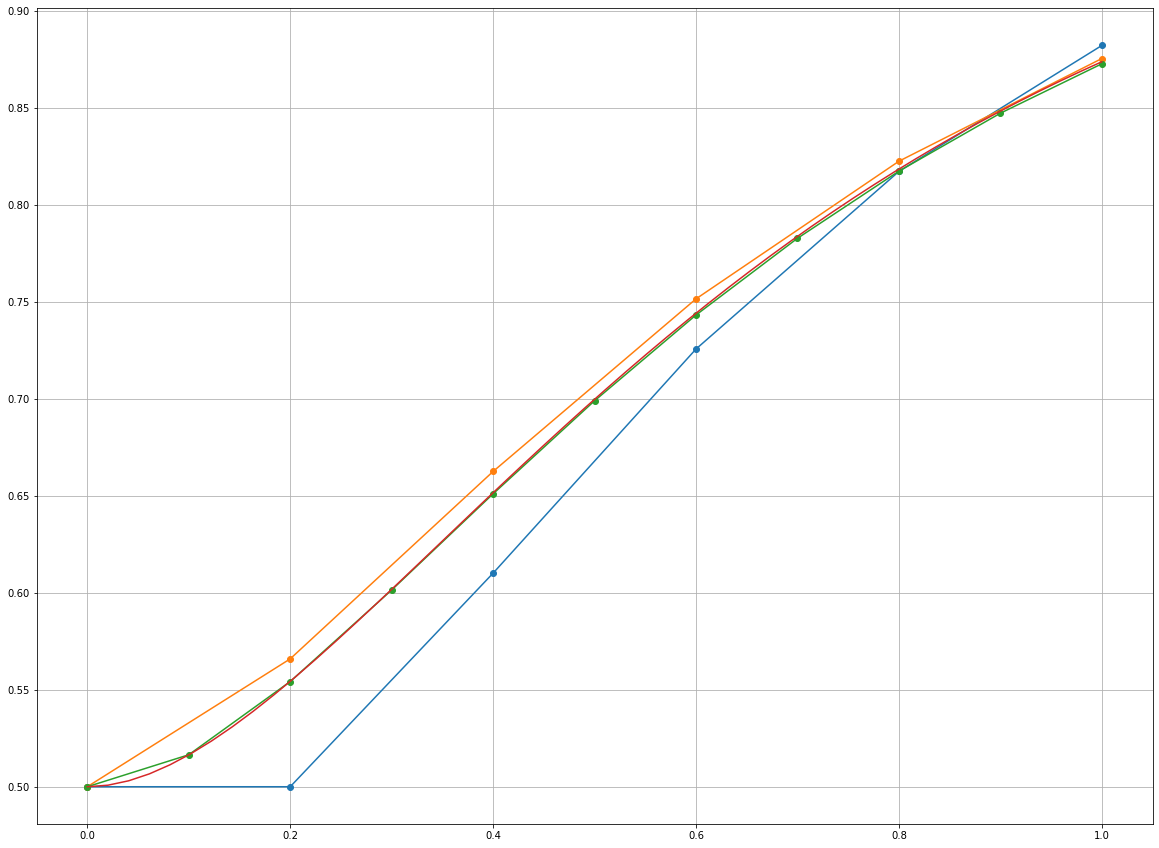

In [90]:
x = np.linspace(0, 1)
plt.figure(figsize=[20,15])
plt.plot(list_sol[0], list_sol[1], '-o')
plt.plot(list_sol_1[0], list_sol_1[1], '-o')
plt.plot(list_sol_2[0], list_sol_2[1], '-o')
plt.plot(x, sol_ecu_dif(x), '-')
plt.grid()

In [91]:
def Rugen_kutta_4(a, b, y0, f, N, verbose=True):
    """
    Implementación método de Euler
    Entradas:
    a -- inicio intervalo
    b -- fin intervalo
    y0 -- aproximación inicial
    f -- función
    N -- pasos

    Salida:
    w -- aproximación final
    """
    h = (b - a)/N
    t = a
    w = y0

    temp1 = [t]
    temp2 = [w]

    if verbose: print("t0  = {0:.2f}, w0  = {1:.12f}".format(t, w))

    def phi(t, w, h):
        k1 = f(t,w)
        k2 = f(t + 0.5*h, w + 0.5*k1*h)
        k3 = f(t + 0.5*h, w + 0.5*k2*h)
        k4 = f(t + h, w + k3*h)
        return (1/6)*(k1 + 2*k2 + 2*k3 + k4)

    for i in range(1, N+1):
        w = w + h* phi(t, w, h)
        t = a + i*h
        if verbose: print("t{0:<2} = {1:.2f}, w{0:<2} = {2:.12f}".format(i, t, w))
        temp1.append(t)
        temp2.append(w)
        list_sol= [temp1, temp2]
    return list_sol, w

In [95]:
print("Método de Rugen-Kutta orden 4:")
def test2(t, y):
    """Función de prueba"""
    return 2 - np.exp(-4*t) - 2*y  # $y'=2-e^{-4t}-2y$

def sol_ecu_dif(t):
    return np.exp(-4*t)*(0.5-np.exp(2*t)+np.exp(4*t))

list_sol_3, sol_3 = Rugen_kutta_4(0, 1, 0.5, test2, 5)
sol_3

Método de Rugen-Kutta orden 4:
t0  = 0.00, w0  = 0.500000000000
t1  = 0.20, w1  = 0.554400709496
t2  = 0.40, w2  = 0.651664636805
t3  = 0.60, w3  = 0.744186740172
t4  = 0.80, w4  = 0.818487592932
t5  = 1.00, w5  = 0.873813963903


0.8738139639032568

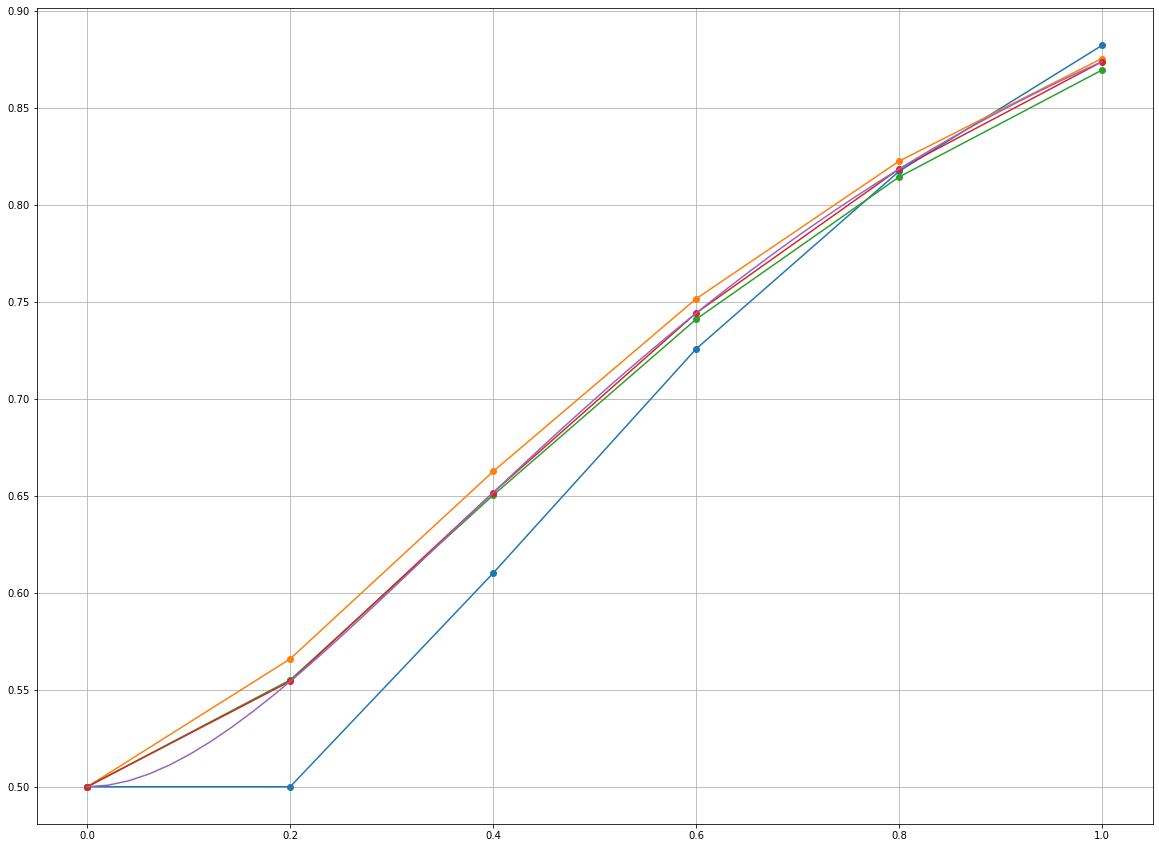

In [99]:
x = np.linspace(0, 1)
plt.figure(figsize=[20,15])
plt.plot(list_sol[0], list_sol[1], '-o')
plt.plot(list_sol_1[0], list_sol_1[1], '-o')
plt.plot(list_sol_2[0], list_sol_2[1], '-o')
plt.plot(list_sol_3[0], list_sol_3[1], '-o')
plt.plot(x, sol_ecu_dif(x), '-')
plt.grid()